In [3]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=500, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a LightGBM model
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
model.fit(X_train, y_train)

# Step 3: Extract and plot feature importances
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]



[LightGBM] [Info] Number of positive: 178, number of negative: 172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2352
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508571 -> initscore=0.034289
[LightGBM] [Info] Start training from score 0.034289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [8]:
y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

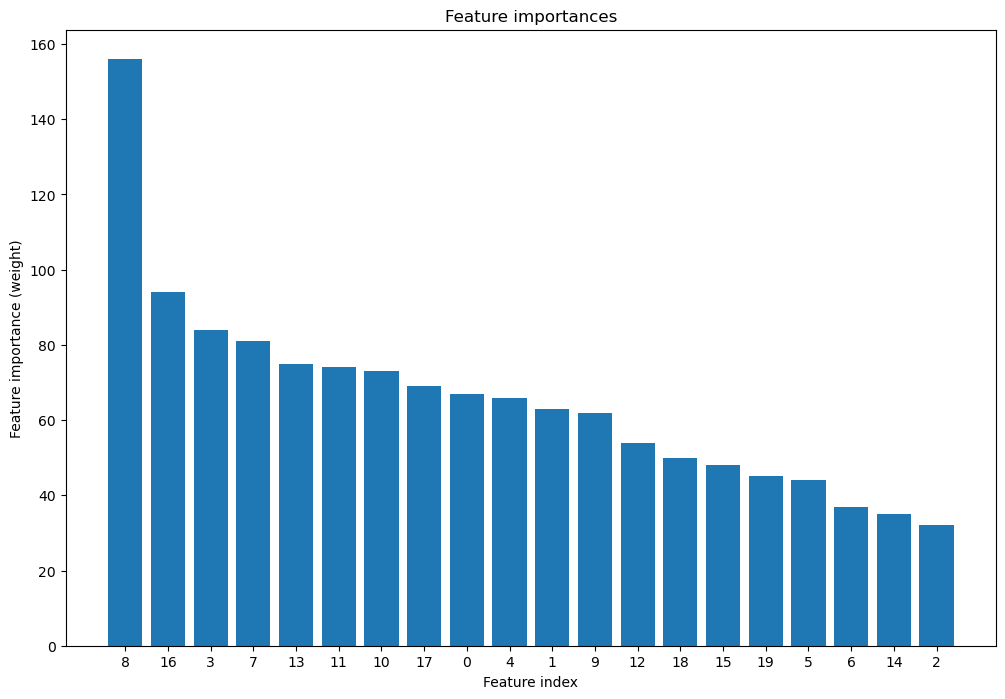

In [4]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature index")
plt.ylabel("Feature importance (weight)")
plt.show()


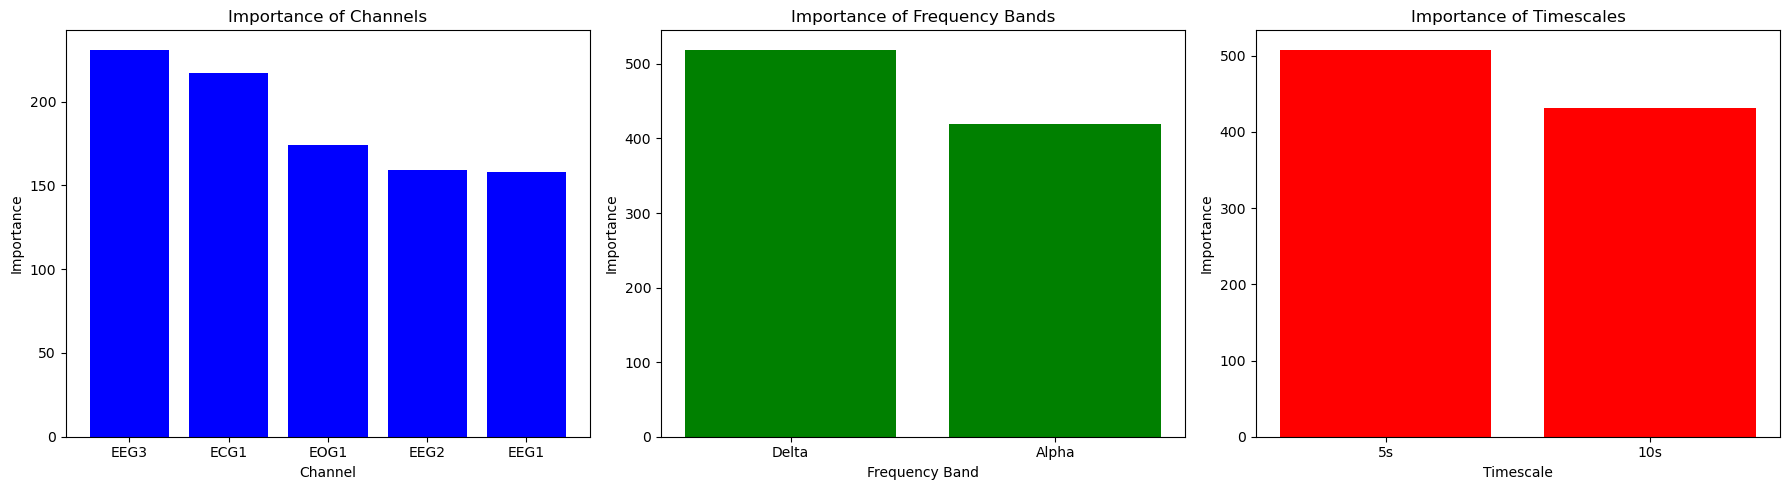

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating feature importances extracted from the model
# These would be replaced by the actual feature_importances from the LightGBM model in practice
feature_importances = np.random.randint(1, 100, size=20)
indices = np.argsort(feature_importances)[::-1]

# Reshape the feature importances to correspond to channels, bands, and timescales
# Assume the order of features is consistent with the specified grouping
importance_matrix = feature_importances.reshape((5, 2, 2))

# Aggregate the importances
channel_importance = importance_matrix.sum(axis=(1, 2))
band_importance = importance_matrix.sum(axis=(0, 2))
timescale_importance = importance_matrix.sum(axis=(0, 1))

# Rank the importances
channels = ['EEG1', 'EEG2', 'EEG3', 'EOG1', 'ECG1']
bands = ['Delta', 'Alpha']
timescales = ['5s', '10s']

# Channel importance
channel_indices = np.argsort(channel_importance)[::-1]
sorted_channels = [channels[i] for i in channel_indices]
sorted_channel_importance = channel_importance[channel_indices]

# Band importance
band_indices = np.argsort(band_importance)[::-1]
sorted_bands = [bands[i] for i in band_indices]
sorted_band_importance = band_importance[band_indices]

# Timescale importance
timescale_indices = np.argsort(timescale_importance)[::-1]
sorted_timescales = [timescales[i] for i in timescale_indices]
sorted_timescale_importance = timescale_importance[timescale_indices]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(sorted_channels, sorted_channel_importance, color='blue')
axes[0].set_title('Importance of Channels')
axes[0].set_ylabel('Importance')
axes[0].set_xlabel('Channel')

axes[1].bar(sorted_bands, sorted_band_importance, color='green')
axes[1].set_title('Importance of Frequency Bands')
axes[1].set_ylabel('Importance')
axes[1].set_xlabel('Frequency Band')

axes[2].bar(sorted_timescales, sorted_timescale_importance, color='red')
axes[2].set_title('Importance of Timescales')
axes[2].set_ylabel('Importance')
axes[2].set_xlabel('Timescale')

plt.tight_layout()
plt.show()
